# API Code for Model Prediction 

In [1]:
# Importing Libraries
import pickle
import numpy as np
import pandas as pd
import pickle
import sklearn
import seaborn as sns
from flask_cors import CORS
import csv
import matplotlib.pyplot as plt 

In [2]:
customer_data = pd.read_csv('Mall_Customers.csv')

In [3]:
import pickle
clustering = pickle.load(open('model.pkl','rb'))
X = pickle.load(open('data.pkl','rb'))


In [4]:
labels = {
    0: "Standard - middle income and middle spenders",
    1: "Careful - high income but low spenders",
    2: "Target group - middle-to-high income and high spenders (should be targeted by the mall)",
    3: "Careless - low income but high spenders (should be avoided because of possible credit risk)",
    4: "Sensible - low income and low spenders"
}

Careful - high income but low spenders
Standard - middle income and middle spenders
Target group - middle-to-high income and high spenders (should be targeted by the mall)
Careless - low income but high spenders (should be avoided because of possible credit risk)
Sensible - low income and low spenders

In [5]:
def predict_function(age,income,score ):
    """
    This is a fuction that predicts
    """

    labels = {
    0: "Careful - high income but low spenders",
    1: "Standard - middle income and middle spenders",
    2: "Target group - middle-to-high income and high spenders (should be targeted by the mall)",
    3: "Careless - low income but high spenders (should be avoided because of possible credit risk)",
    4: "Sensible - low income and low spenders"
    }
    
    # Predict a single value
    new_data_point = np.array([[age, income ,score]])  # The new data point to predict
    
    # Concatenate new data point with existing data
    augmented_data = np.concatenate((X, new_data_point))
    
    # Refit the clustering algorithm
    clustering.fit(augmented_data)
    
    # Get the cluster labels
    cluster_labels = clustering.labels_
    
    # Retrieve the predicted cluster for the new data point
    predicted_cluster = cluster_labels[-1]

    prediction = {
    'Cluster': int(predicted_cluster),
    'labels' : labels[int(predicted_cluster)]
    }

    return prediction
    

In [6]:
predict_function(22,10,10)

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


{'Cluster': 4, 'labels': 'Sensible - low income and low spenders'}

# API Code for Training Model (csv file to building clustering model)

In [7]:
def csv_to_model(customer_data):
    """
    Takes Inpute as csv and trains clustering model with hierarchical clustering

    Parameters:
    customer_data (file )  it should be csv file

    Return:
    df : final preprocessed data + prediction  = dataframe

    """

    #Applying One Hot Encoding on Genre Column
    from sklearn.preprocessing import OneHotEncoder
    ohe = OneHotEncoder(drop='first',sparse=False,dtype=np.int32)
    data_new = ohe.fit_transform(customer_data[['Genre']])

    customer_data['Gender'] = data_new
    # Drop a single column
    customer_data = customer_data.drop('Genre', axis=1)

    #final Data 
    data = customer_data.iloc[:, 1:4].values

    #Building Model 
    from sklearn.cluster import AgglomerativeClustering
    cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward' ,)
    cluster.fit(data)

    # Output 
    prediction = cluster.fit_predict(data)

    #final Output dataframe 
    columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
    df = pd.DataFrame(data , columns=columns)
    df['Cluster_Id'] = prediction
    return df

# API Code for generating pie chart

In [8]:

def pie_chart(df):
    """
    Takes Inpute as pandas dataframe  

    Parameters:
    df (pandas dataframe )  

    Return:
    Pie chart : pie_chart.png

    """



    # Printing Count of Values in Each cluster 
    df['Cluster_Id'].value_counts()
    values_in_cluster = []
    for i in df['Cluster_Id'].value_counts():
        values_in_cluster.append(i)
    
    # print(values_in_cluster)

    plt.figure(figsize=(10,8))

    # Calculate the count or proportion of data points in each cluster
    # cluster_counts = [83, 39, 35 ,23 ,20]  # Example cluster counts
    cluster_counts = values_in_cluster #passing list here from above
    
    # Labels for the pie chart
    labels = ['Cluster 0' , 'Cluster 1', 'Cluster 2' , 'Cluster 3' , 'Cluster 4']
    labels2 = ['Cluster 0: "Standard - middle income and middle spenders' , 'Cluster 1: Careful - high income but low spenders', 'Cluster 2: Target group - middle-to-high income and high spenders (should be targeted by the mall)' , 'Cluster 3: Careless - low income but high spenders (should be avoided because of possible credit risk) ' , 'Cluster 4: Sensible - low income and low spenders']
    
    
    # Specify colors for each slice
    colors = ['#ADD8E6', '#90EE90', '#FFB6C1' ,'#FFFFE0' , '#E6E6FA']
    
    # Create the pie chart
    plt.pie(cluster_counts, labels=labels, colors=colors, autopct='%1.1f%%', )
    
    # Add a title
    plt.title('Cluster Distribution')
    # Add a legend
    plt.legend(labels2, loc='best')
    #figure Size
    
    
    # Display the pie chart
    # plt.show()
    
    # sAVING fIGURE
    img = plt.savefig('pie_chart.png')
    return img

    

In [9]:
help(pie_chart)

Help on function pie_chart in module __main__:

pie_chart(df)
    Takes Inpute as pandas dataframe  
    
    Parameters:
    df (pandas dataframe )  
    
    Return:
    Pie chart : pie_chart.png



# Stastical Analysis of clusters (0-4) code

In [10]:
def cluster_analysis(df):

    """
    Takes Inpute as pandas dataframe  

    Parameters:
    df (pandas dataframe )  

    Return:
    Pie chart : pie_chart.png

    """

    df[['Age', 'Annual Income (k$)','Spending Score (1-100)','Cluster_Id']].groupby('Cluster_Id').mean()
    # Grouping Data into seperate clusters
    group_0= df[df['Cluster_Id']==0]
    group_1= df[df['Cluster_Id']==1]
    group_2= df[df['Cluster_Id']==2]
    group_3= df[df['Cluster_Id']==3]
    group_4= df[df['Cluster_Id']==4]


    Analysis_data = {
    'cluster 0' : {
        'Average Age' : round(group_0.mean()['Age']),
        'Average Annual Income(K$)': round(group_0.mean()['Annual Income (k$)']),
        'Spending Score (1-100)': round(group_0.mean()['Spending Score (1-100)'])
        },
    'cluster 1' : {
        'Average Age' : round(group_1.mean()['Age']),
        'Average Annual Income(K$)': round(group_1.mean()['Annual Income (k$)']),
        'Spending Score (1-100)': round(group_1.mean()['Spending Score (1-100)'])
        },
    'cluster 2' : {
        'Average Age' : round(group_2.mean()['Age']),
        'Average Annual Income(K$)': round(group_2.mean()['Annual Income (k$)']),
        'Spending Score (1-100)': round(group_2.mean()['Spending Score (1-100)'])
        },
    'cluster 3' : {
        'Average Age' : round(group_3.mean()['Age']),
        'Average Annual Income(K$)': round(group_3.mean()['Annual Income (k$)']),
        'Spending Score (1-100)': round(group_3.mean()['Spending Score (1-100)'])
        },
    'cluster 4' : {
        'Average Age' : round(group_4.mean()['Age']),
        'Average Annual Income(K$)': round(group_4.mean()['Annual Income (k$)']),
        'Spending Score (1-100)': round(group_4.mean()['Spending Score (1-100)'])
        },
    }

    return Analysis_data

In [11]:
df = csv_to_model(customer_data)

Analysis = cluster_analysis(df)


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [12]:
print(Analysis)

{'cluster 0': {'Average Age': 42, 'Average Annual Income(K$)': 55, 'Spending Score (1-100)': 50}, 'cluster 1': {'Average Age': 42, 'Average Annual Income(K$)': 88, 'Spending Score (1-100)': 17}, 'cluster 2': {'Average Age': 33, 'Average Annual Income(K$)': 87, 'Spending Score (1-100)': 82}, 'cluster 3': {'Average Age': 25, 'Average Annual Income(K$)': 25, 'Spending Score (1-100)': 81}, 'cluster 4': {'Average Age': 45, 'Average Annual Income(K$)': 26, 'Spending Score (1-100)': 21}}


# API Code to generate scatter plot

In [17]:
def scatter_plot(customer_data):
    '''
    This Function is used to generate scatter plot 
    
    '''

    #Applying One Hot Encoding on Genre Column

    from sklearn.preprocessing import OneHotEncoder

    ohe = OneHotEncoder(drop='first',sparse=False,dtype=np.int32)

    data_new = ohe.fit_transform(customer_data[['Genre']])




    customer_data['Gender'] = data_new

    # Drop a single column

    customer_data = customer_data.drop('Genre', axis=1)




    #final Data

    data = customer_data.iloc[:, 1:4].values




    #Building Model

    from sklearn.cluster import AgglomerativeClustering

    cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward' ,)

    cluster.fit(data)




    # Output

    prediction = cluster.fit_predict(data)

    graph_data = data[:,1:3]




   

    #sns.scatterplot(y = "Spending Score (1-100)" , x= "Annual Income (k$)" , data = customer_data , hue = prediction , palette="rainbow")

    #Final clustering Graph

    plt.figure(figsize=(12,7))

    plt.scatter(graph_data[prediction == 0, 0], graph_data[prediction == 0, 1], s = 100, c = 'red', label = 'Standard')

    plt.scatter(graph_data[prediction == 1, 0], graph_data[prediction == 1, 1], s = 100, c = 'blue', label = 'Careful')

    plt.scatter(graph_data[prediction == 2, 0], graph_data[prediction == 2, 1], s = 100, c = 'green', label = 'Target group')

    plt.scatter(graph_data[prediction == 3, 0], graph_data[prediction == 3, 1], s = 100, c = 'orange', label = 'Careless')

    plt.scatter(graph_data[prediction == 4, 0], graph_data[prediction == 4, 1], s = 100, c = 'magenta', label = 'Sensible')

   

    plt.title('Clustering of customers',fontsize=20)

    plt.xlabel('Annual Income (k$)',fontsize=16)

    plt.ylabel('Spending Score (1-100)',fontsize=16)

    plt.legend(fontsize=16)

    plt.grid(True)

    plt.axhspan(ymin=60,ymax=100,xmin=0.4,xmax=0.96,alpha=0.3,color='yellow')

    #plt.show()




    scatter_plot = plt.savefig('scatterplot.png')

    image_path = 'scatterplot.png'

    return scatter_plot

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


FileNotFoundError: [Errno 2] No such file or directory: 'flask/scatterplot.png'

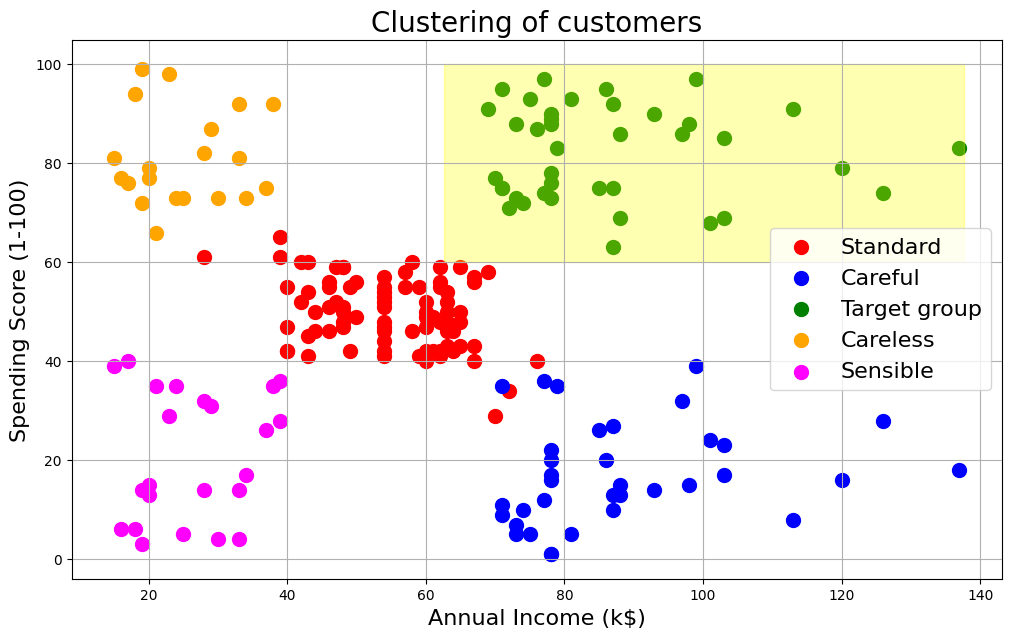

In [19]:
scatter_plot(customer_data)